<a href="https://colab.research.google.com/github/kusum83/Pipelines-Projects/blob/main/M507_Methods_of_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M507A - Methods of Prediction**
# **Individual Final Project**

**Submitted by : Kusum Itagi Kotreshi (GH1027001)**

**Submitted on :  July 2024**

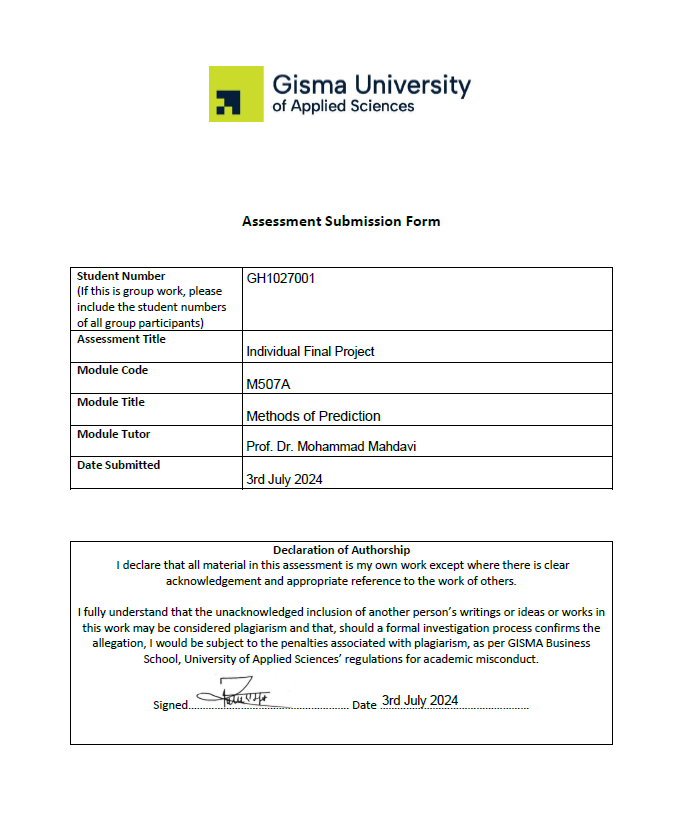

# Selected Business Problem: Customer Churn Prediction

For subscription-based businesses like telecommunications companies, customer churn is a major challenge. Churn occurs when a customer stops using a company's service. Retaining existing customers is generally more cost-effective than acquiring new ones, making churn prediction crucial for maintaining business sustainability.

Predicting customer churn allows the company to actively engage customers at risk of leaving by offering them incentives to stay. This proactive approach can significantly reduce the churn rate, thereby increasing the company's revenue and enhancing the customer lifetime value.

By implementing a churn prediction model, the company can effectively lower customer attrition rates, enhance customer satisfaction through targeted interventions, and ultimately improve profitability. We will approach this as a binary classification problem, where the target variable indicates whether a customer will churn (Yes/No). Our process involves preprocessing the dataset, engineering the necessary features, and then training a deep neural network to predict churn.

In [ ]:
!pip install shap

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpt
import tensorflow as tf
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization

The above code imports all the necessary libraries for the tasks performrd in the upcoming codes

In [ ]:
url = "/content/Telco-Customer-Churn Dataset.csv"
df = pd.read_csv(url)

The above code imports the dataset as df from an uploaded csv file

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The head() function displays the first 5 rows of the data set along with the column names to give an overview of the dataset

**About the Data :** For this task, I will be using the Telco Customer Churn Dataset available on Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn), which provides a comprehensive set of features related to customer demographics, account information, and service usage.

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("df size:", df.shape)
print("df train size:", df_train.shape)
print("df test size:", df_test.shape)

df size: (7043, 21)
df train size: (5634, 21)
df test size: (1409, 21)


In the above code the dataset is split into training and testing datasets and their sizes are displayed

In [ ]:
x_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']
x_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (5634, 20)
y_train size: (5634,)
x_test size: (1409, 20)
y_test size: (1409,)


In the above code the train and test datasets are again split into x and y training and testing datasets and the target variable "Churn" is dropped from the x datasets and y datasets are made the target label

# Data Exploration and Preprocessing

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The columns function when called upon a dataset displays all the column names in that data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The info() function gives an overall information such as the total number of entries, the columns, and the presence of null values, as well as the data type of each column in the dataset.

This dataset has a total of 7043 entries.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


The describe() function generates descriptive statistics of all the quantitative columns of the dataset and the .T is transpose, it works by exchanging the rows and columns. Here, it is used to represent the data in a more presentable manner.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The isnull() function is used to findout if there are any null values in the dataset and the sum() function gives the total number of null values
As we can see there are no null values in the dataset

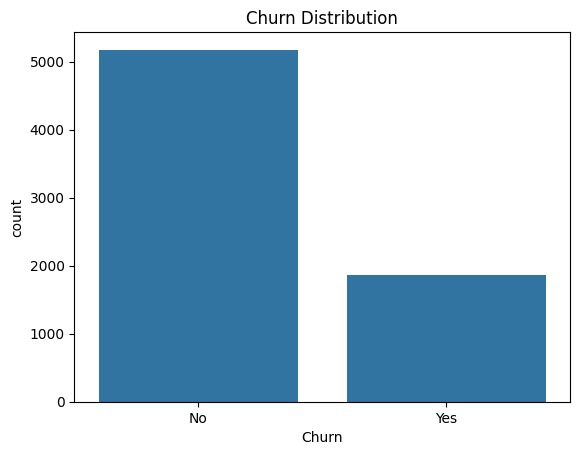

In [ ]:
sb.countplot(x='Churn', data=df)
mpt.title('Churn Distribution')
mpt.show()

The sb.countplot() function creates a count plot that displays the counts of observations in each categorical bin using bars with x='Churn' specifies the column in the dataset to be used for the x-axis, which is the target variable 'Churn' and df=data specifies the DataFrame containing the data to be plotted.

The mpt.title() function Adds a title to the plot which is 'Churn Distribution' and displayed by the show() function here.

The plot churn distribution code is used to visualize the distribution of the target variable in the dataset. This step is important for understanding the class balance in the data, which can significantly impact the performance of the machine learning model.

In [ ]:
num_df = df.select_dtypes(include=[np.number])
num_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Axes: >

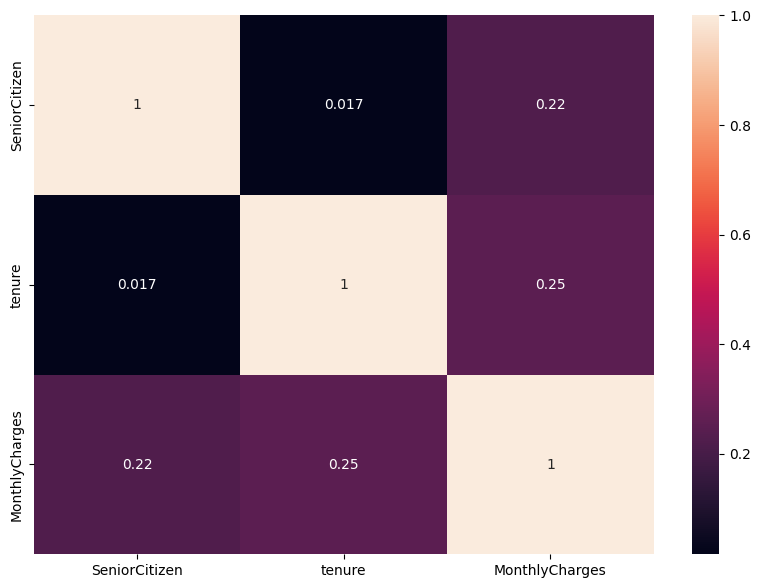

In [ ]:
mpt.figure(figsize = (10,7))
sb.heatmap(num_df.corr(), annot = True)

In the above code the correlation matrix that shows the relationship between the SeniorCitizen, tenure and MonthlyCharges columns is provided.

# Feature Engineering

In [ ]:
encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In the above code, label encoding is performed on the categorical variables to convert them into numerical data.

It selects all columns with data type 'object' and creates an instance which will be used to encode the categorical values. Then it fits the label encoder to the column's unique values and transforms the data into numerical values, that can be used in ML models. Later normalisation is done on the features to ensure that they are on a similar scale, which helps improve the performance and convergence of gradient-based algorithms used in neural networks.

# Model Training

# *Deep Neural Network (DNN)*

Deep Neural Network (DNN) is a type of artificial neural network with multiple layers between the input and output layers. Here the DNN model consists of several dense (fully connected) layers, and dropout layers, which help to prevent overfitting.

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = dnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
141/141 [==============================] - 3s 7ms/step - loss: 0.5590 - accuracy: 0.7231 - val_loss: 0.4436 - val_accuracy: 0.7835
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7471 - val_loss: 0.4310 - val_accuracy: 0.7897
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7692 - val_loss: 0.4254 - val_accuracy: 0.7897
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7708 - val_loss: 0.4216 - val_accuracy: 0.7897
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7726 - val_loss: 0.4196 - val_accuracy: 0.7924
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7715 - val_loss: 0.4180 - val_accuracy: 0.7950
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7770 - val_loss: 0.4187 - val_accuracy: 0.7959
Epoch 

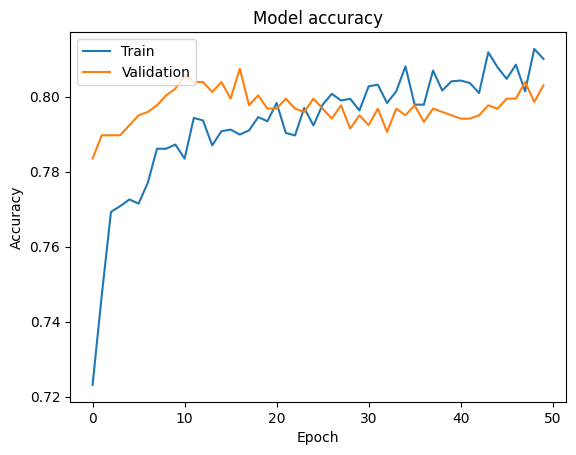

In [ ]:
mpt.plot(history.history['accuracy'])
mpt.plot(history.history['val_accuracy'])
mpt.title('Model accuracy')
mpt.ylabel('Accuracy')
mpt.xlabel('Epoch')
mpt.legend(['Train', 'Validation'], loc='upper left')
mpt.show()

# Model Evaluation

Below are the steps to estimate the performance of each neural network model on the test data, by evaluating the models using accuracy, confusion matrix, and classification report.

In [ ]:
# Evaluating the DNN model on the test set
dnn_loss, dnn_accuracy = dnn_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {dnn_accuracy:.4f}')

45/45 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8126
Test Accuracy: 0.8126


In [ ]:
# Displaying classification for DNNreport
dnn_predictions = (dnn_model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, dnn_predictions))

45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1036
           1       0.73      0.46      0.57       373

    accuracy                           0.81      1409
   macro avg       0.78      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
#  Displaying confusion matrix for DNN model
print("DNN Confusion Matrix:")
print(confusion_matrix(y_test, dnn_predictions))

DNN Confusion Matrix:
[[973  63]
 [201 172]]


# Experiments

In [ ]:
def build_model(input_dim, layers=[64, 32], dropout_rate=0.5):
    model = Sequential()
    for units in layers:
        model.add(Dense(units, input_dim=input_dim, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

results = []

for layers in [[64, 32], [128, 64], [32, 16]]:
    for dropout_rate in [0.3, 0.5, 0.7]:
        model = build_model(x_train.shape[1], layers=layers, dropout_rate=dropout_rate)
        history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        val_accuracy = max(history.history['val_accuracy'])
        results.append((layers, dropout_rate, val_accuracy))

results_df = pd.DataFrame(results, columns=['Layers', 'Dropout Rate', 'Validation Accuracy'])
print(results_df)

      Layers  Dropout Rate  Validation Accuracy
0   [64, 32]           0.3             0.807453
1   [64, 32]           0.5             0.802130
2   [64, 32]           0.7             0.803017
3  [128, 64]           0.3             0.805679
4  [128, 64]           0.5             0.807453
5  [128, 64]           0.7             0.806566
6   [32, 16]           0.3             0.811003
7   [32, 16]           0.5             0.800355
8   [32, 16]           0.7             0.801242


The above code consists of a function that builds and compiles a neural network model and then experiments with different configurations of layers and dropout rates to evaluate their accuracies.

This is done to find the best combination of layers and dropout rates for a neural network by defining a flexible model-building function, experimenting with various configurations and recording by displaying the accuracies for each configuration to identify the best model setup.

# Model Assessment

To summarize the performance of all models, I have compiled the accuracy scores and provide a comparative overview.

Summary of Test Accuracies:
CNN Model: 0.7963
LSTM Model: 0.7871
DNN Model: 0.8126
Batch Normalization Model: 0.8062


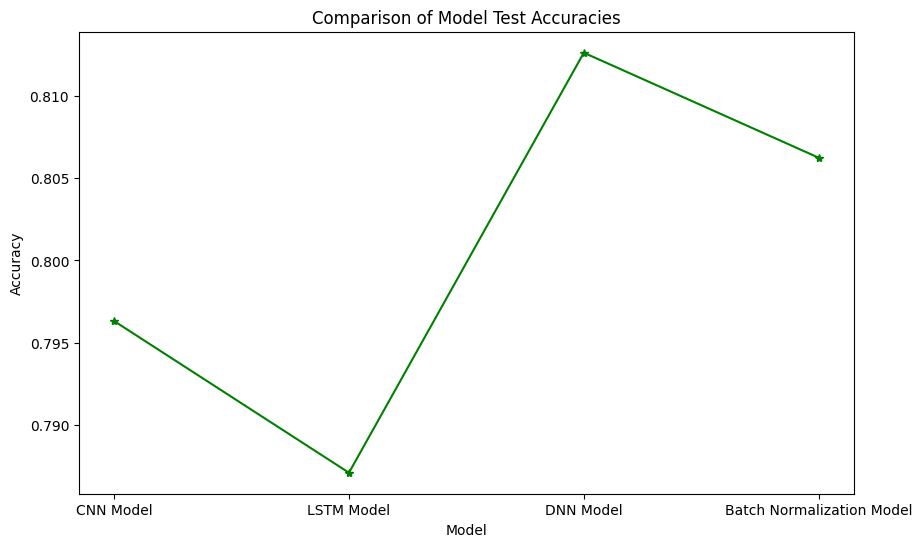

In [ ]:
accuracies = {
    'CNN Model': cnn_accuracy,
    'LSTM Model': lstm_accuracy,
    'DNN Model': dnn_accuracy,
    'Batch Normalization Model': bn_accuracy
}

print("Summary of Test Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

mpt.figure(figsize=(10, 6))
mpt.plot(accuracies.keys(), accuracies.values(), marker='*', linestyle='-', color = "green")
mpt.xlabel('Model')
mpt.ylabel('Accuracy')
mpt.title('Comparison of Model Test Accuracies')
mpt.show()

# Final Discussion and Conclusion

*Implications for the Business Problem*

The ultimate goal of predicting customer churn is to determine which customers are at high risk for leaving the service so that targeted interventions can be deployed for their retention. How would our model results be put into practice?

Proactive Retention Strategies:
Models can help businesses identify customers at high risk of churn. The company can then apply customized retention strategies, such as special offers, discounts, or personalized communication, to ensure these customers remain.

Resource Allocation:
Since it predicts customers who are likely to defect, the company will concentrate resources on those customers to prevent their exit rather than distributing efforts equally among all customers.

Improved Customer Understanding:
Knowing what causes churn helps refine business strategies. For instance, if certain contract types or service issues correlate with higher churn rates, then these areas could be targeted for improvement.

*Advantages and Disadvantages of the Proposed Solution*

Advantages:

* High Accuracy: Models developed, particularly the initial DNN models and batch normalization, showed high churn predictability, making them dependable tools for the company.

* Actionable Insights: The model results provide actionable insights into customer behavior, allowing for targeted interventions.

* Scalability: These models can be scaled and reconfigured with incoming data, which could further help in enhancing their performance.

Limitations:

Computational Resources: Neural network models, especially CNNs and LSTMs, require significant computational power and time for training.

Interpretability: The decisions neural networks take are often seen as black boxes. Techniques like SHAP (SHapley Additive Explanations) are beneficial but add another layer of complexity.

Hazard of Overfitting: Improper regularization and cross-validation can result in overfitting, where the model performs well on training data but poorly on unseen data.

*Recommendations*

* Deployment: Deploy the DNN model for practical, real-time churn prediction, considering it has the highest accuracy.
* Continuous Monitoring: Monitor the model regularly and update it using fresh data to maintain high accuracy.
* Feature Importance: Use SHAP or similar techniques to understand the most critical features contributing to churn. This can aid in making informed business decisions.
* Customer Engagement: Develop targeted engagement strategies based on model predictions to effectively reduce churn rates.

*Conclusion*

Deep learning models developed for predicting customer churn have performed well, especially the DNN and batch normalization models. These models offer deep insights and practical tools for the firm that can help increase customer retention and profitability. By leveraging these models, the company can implement more effective and efficient customer engagement strategies that reduce churn and enhance customer satisfaction. The insights from the models also provide a foundation for continuous improvement in understanding and responding to customer behavior.